# Camera calibration

In [43]:
#import all dependencies

import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

%matplotlib inline
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
%autoreload 2
import camera as cam

#find chessboard corners for all calibration images
obj_points = []
img_points = []

camera_cal_imgs = [f for f in glob.glob("camera_cal/*.jpg")]
for img_path in camera_cal_imgs:
    pattern_found, objp, corners = cam.extract_obj_points(img_path, 9, 6)
    if pattern_found:
        obj_points.append(objp)
        img_points.append(corners)


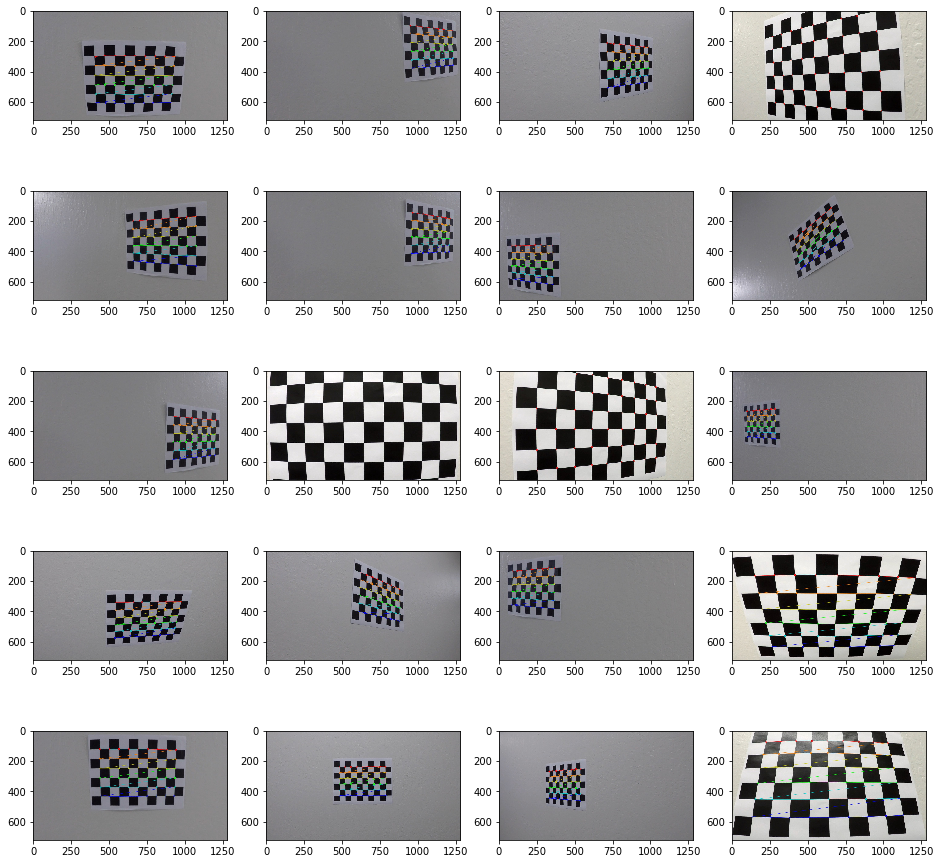

In [62]:
import visualization as vs

#display chessboard photos with found corners
vs.show_img_grid("cb_corners", 4, (16, 16))

In [63]:
#perform camera calibration 

#for chessboard images
cb_img_test = cv2.imread('camera_cal/calibration1.jpg')
cb_img_size = (cb_img_test.shape[1], cb_img_test.shape[0])

ret, mtx, dist, rvecs, tvecs = cam.calibrate_camera(obj_points, img_points, cb_img_size)